# Задание 1. Пункт 3
4. На двух переменных из п2 вычислить квадратичную разделяющую функцию непосредственно по оценкам ковариационных матриц и средних (самостоятельно реализовать метод, не используя готовый). Визуализировать её и сравнить с решением из п2.

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Сразу прогаем формулу, она есть тут: https://online.stat.psu.edu/stat508/book/export/html/696

In [121]:
def quadratic_discriminant_function(point, mean_vector, cov_matrix, prior_prob):
    return -0.5 * np.log(np.linalg.det(cov_matrix)) - 0.5 * (point - mean_vector).T.dot(np.linalg.inv(cov_matrix)).dot(point - mean_vector) + np.log(prior_prob)

Загружаем датасет, выбираем те же переменные

In [122]:
iris = datasets.load_iris()

x = iris.data[:, [2, 3]]
y = iris.target

Теперь строим сетку, чтобы применить нашу формулу везде

In [123]:
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

mesh_x, mesh_y = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

Ищем мат ожидания, матрицу ковариантности, априорную вероятность (https://www.geeksforgeeks.org/quadratic-discriminant-analysis/)

In [124]:
mean_vectors = []
cov_matrices = []
prior_probs = []

for i in np.unique(y):
    mean_vectors.append(np.mean(x[y == i], axis=0))
    cov_matrices.append(np.cov(x[y == i].T))
    prior_probs.append(np.sum(y == i) / len(y))
    

А тут мы уже применяем нашу функцию

In [125]:
res = []
for point in np.array([mesh_x.ravel(), mesh_y.ravel()]).T:
    qdf_scores = []
    for mean_vector, cov_matrix, prior_prob in zip(mean_vectors, cov_matrices, prior_probs):
        qdf_scores.append(quadratic_discriminant_function(point, mean_vector, cov_matrix, prior_prob))
    res.append(np.argmax(qdf_scores))

Строим график

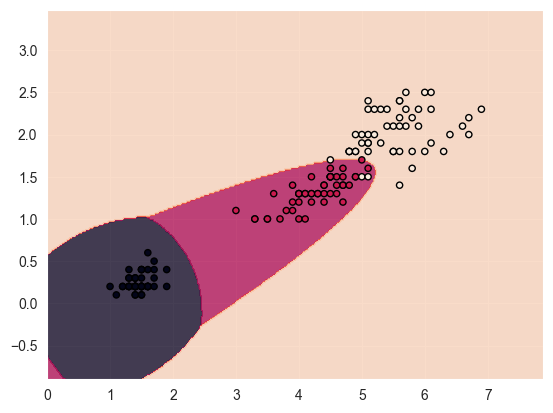

In [126]:
fig, ax = plt.subplots()
ax.contourf(mesh_x, mesh_y, np.array(res).reshape(mesh_x.shape), alpha=0.8)
ax.scatter(x[:, 0], x[:, 1], c=y, edgecolor='k', s=20)
plt.show()